In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("TESLA.CSV")

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [6]:
# Univariate time-series
stock_data=df[["Date","Close"]]

In [7]:
stock_data.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [9]:
stock_data['Date']=pd.to_datetime(stock_data['Date'])

/tmp/ipykernel_77/3223040857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date']=pd.to_datetime(stock_data['Date'])


In [10]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [11]:
stock_data.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


# why we are converting date column as a index column
# i can easily retrive the data
# visulization is also simple
# those lib has been degine in such a way it required date column as a index(scipy statsmodel)

In [12]:
stock_data.set_index('Date',inplace=True)

In [13]:
stock_data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


In [14]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


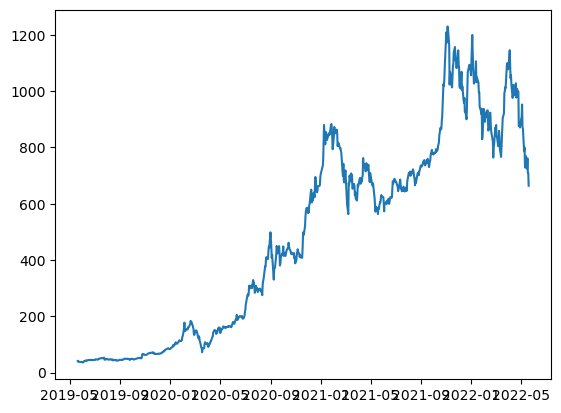

In [15]:
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

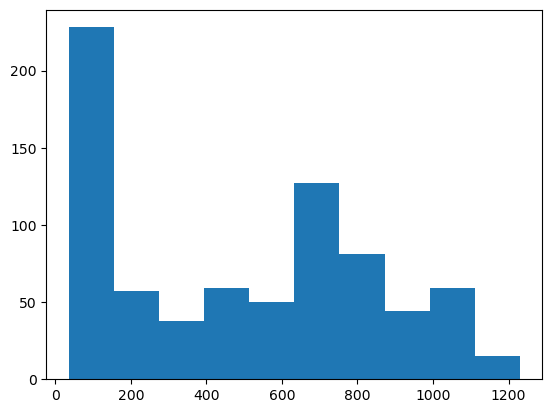

In [16]:
plt.hist(stock_data.Close)

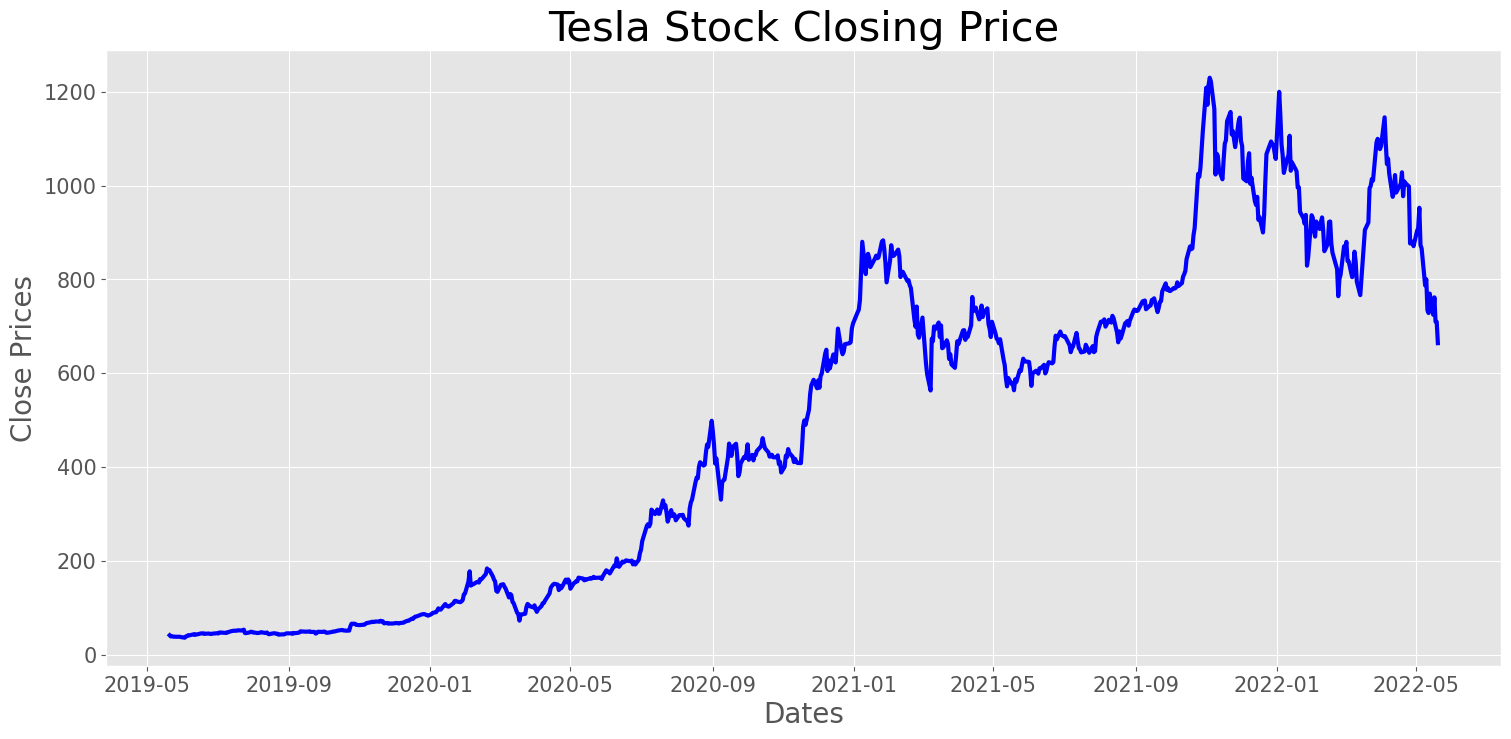

In [17]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) 
plt.xlabel('Dates', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15) 
plt.plot(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

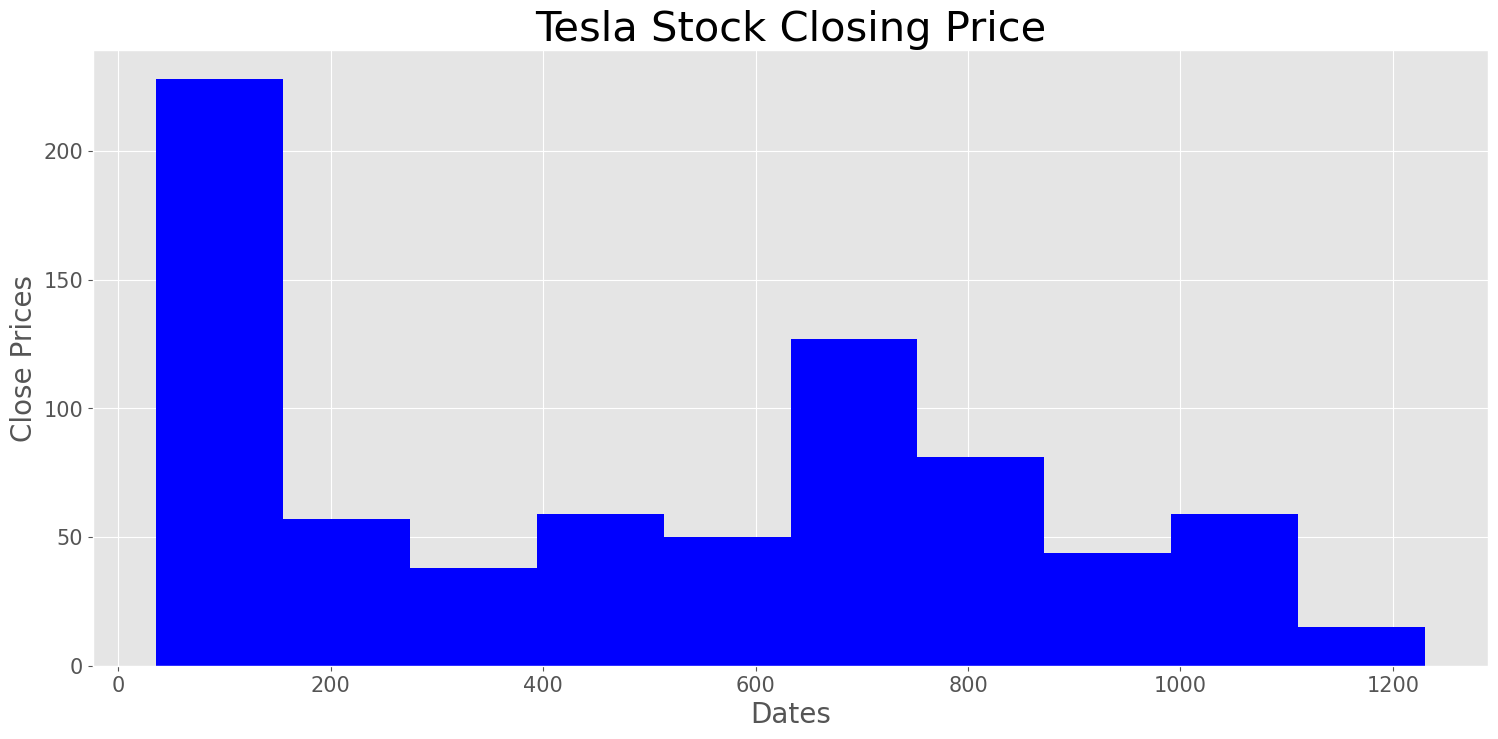

In [18]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) 
plt.xlabel('Dates', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15) 
plt.hist(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

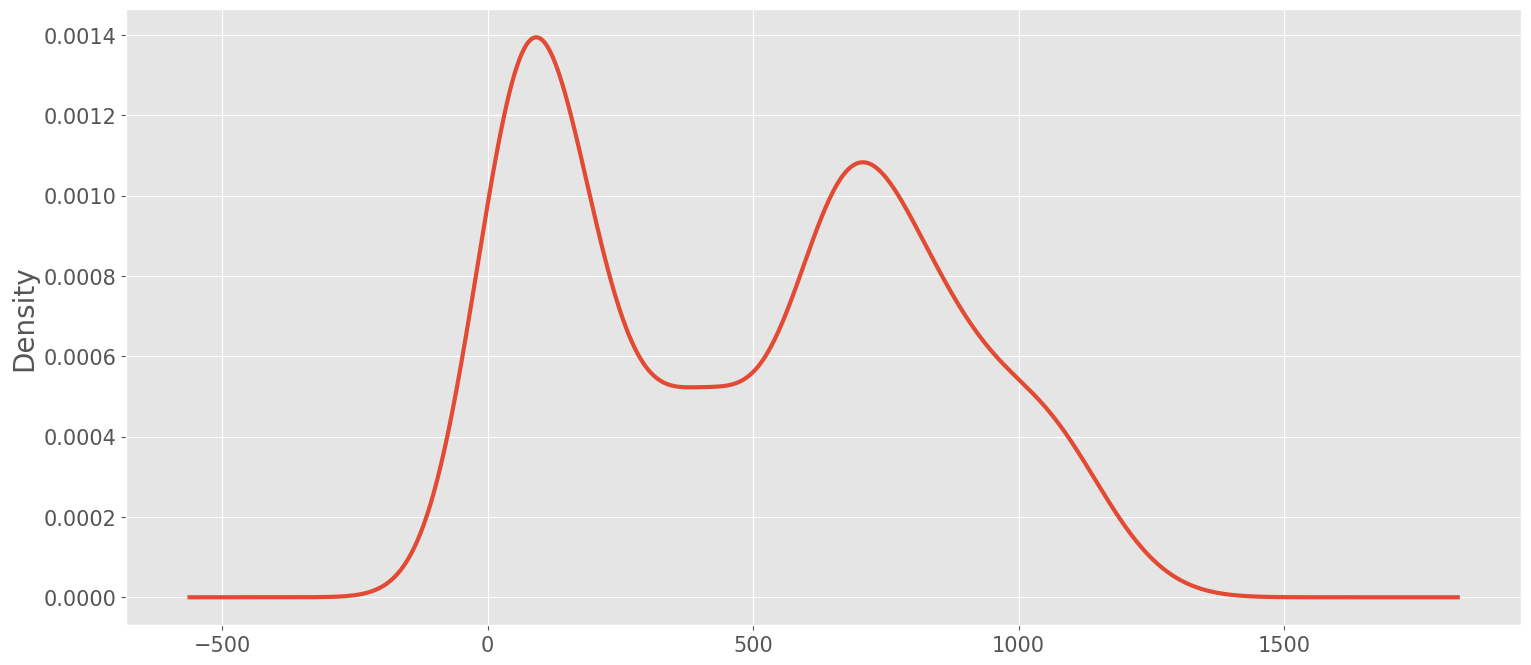

In [19]:
# Distribution of the close price  
df_close = stock_data['Close'] 
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [30]:
rolmean=stock_data['Close'].rolling(48).mean()

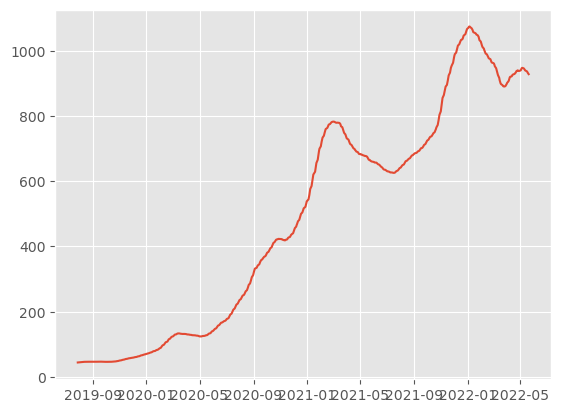

In [31]:
plt.plot(rolmean)

In [32]:
rolstd=stock_data['Close'].rolling(48).std()

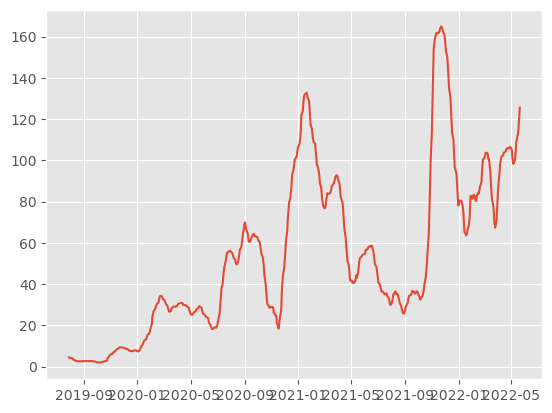

In [33]:
plt.plot(rolstd)

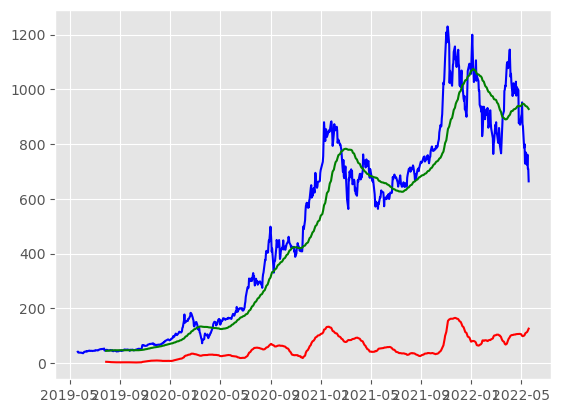

In [36]:
plt.plot(stock_data.Close,color='b')
plt.plot(rolmean,color='g')
plt.plot(rolstd,color='r')

In [37]:
#ADF-Ada fuller test
from statsmodels.tsa.stattools import adfuller
adf=adfuller(stock_data['Close'])

In [38]:
adf

(-1.36300858170375,
 0.5998762543050691,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [39]:
adf[:4]

(-1.36300858170375, 0.5998762543050691, 9, 748)

In [40]:
pd.Series(adf[:4],index=['Test Stats','p-value','lag','data points'])

Test Stats      -1.363009
p-value          0.599876
lag              9.000000
data points    748.000000
dtype: float64

In [44]:
# This is same as we have done above(only in good manner)
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)


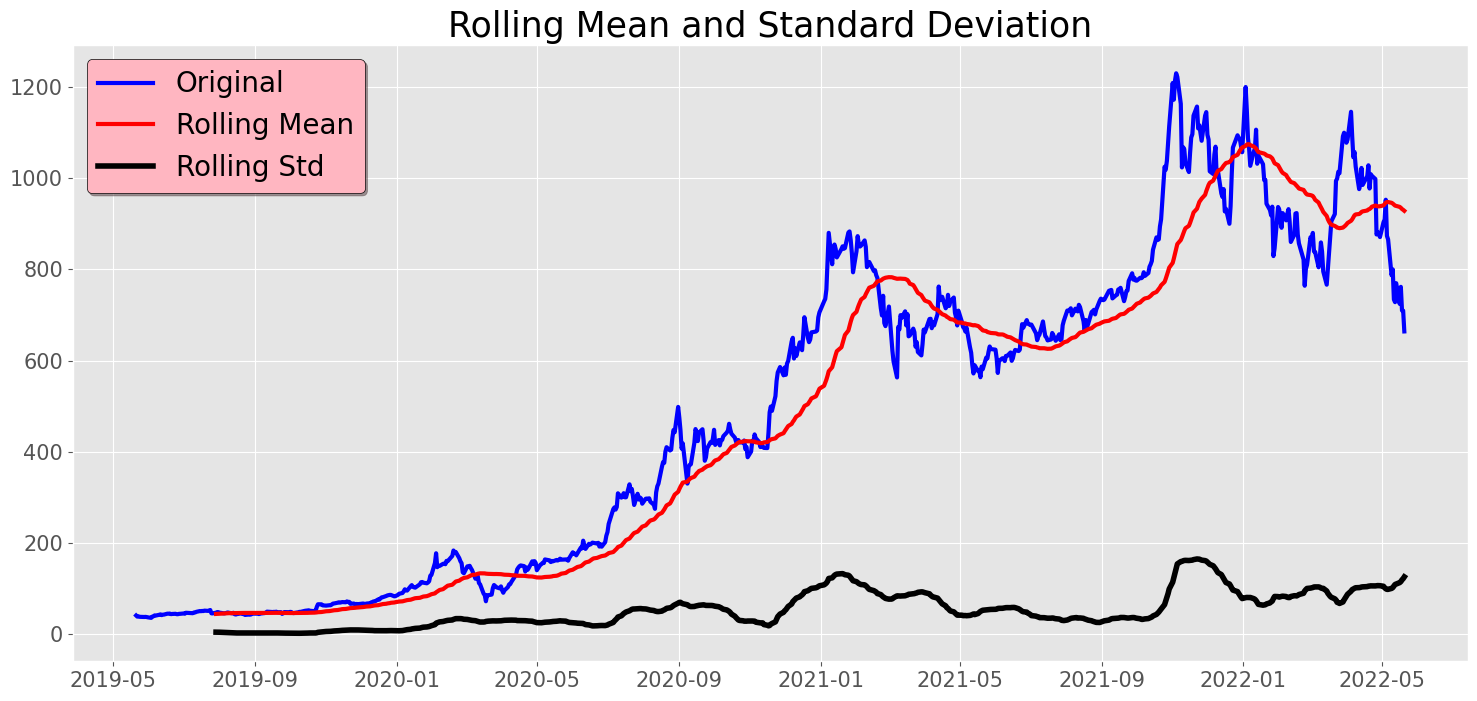

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [45]:
test_stationarity(stock_data['Close'])

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["Close"]],period=12)

In [47]:
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

<Figure size 2000x1000 with 0 Axes>

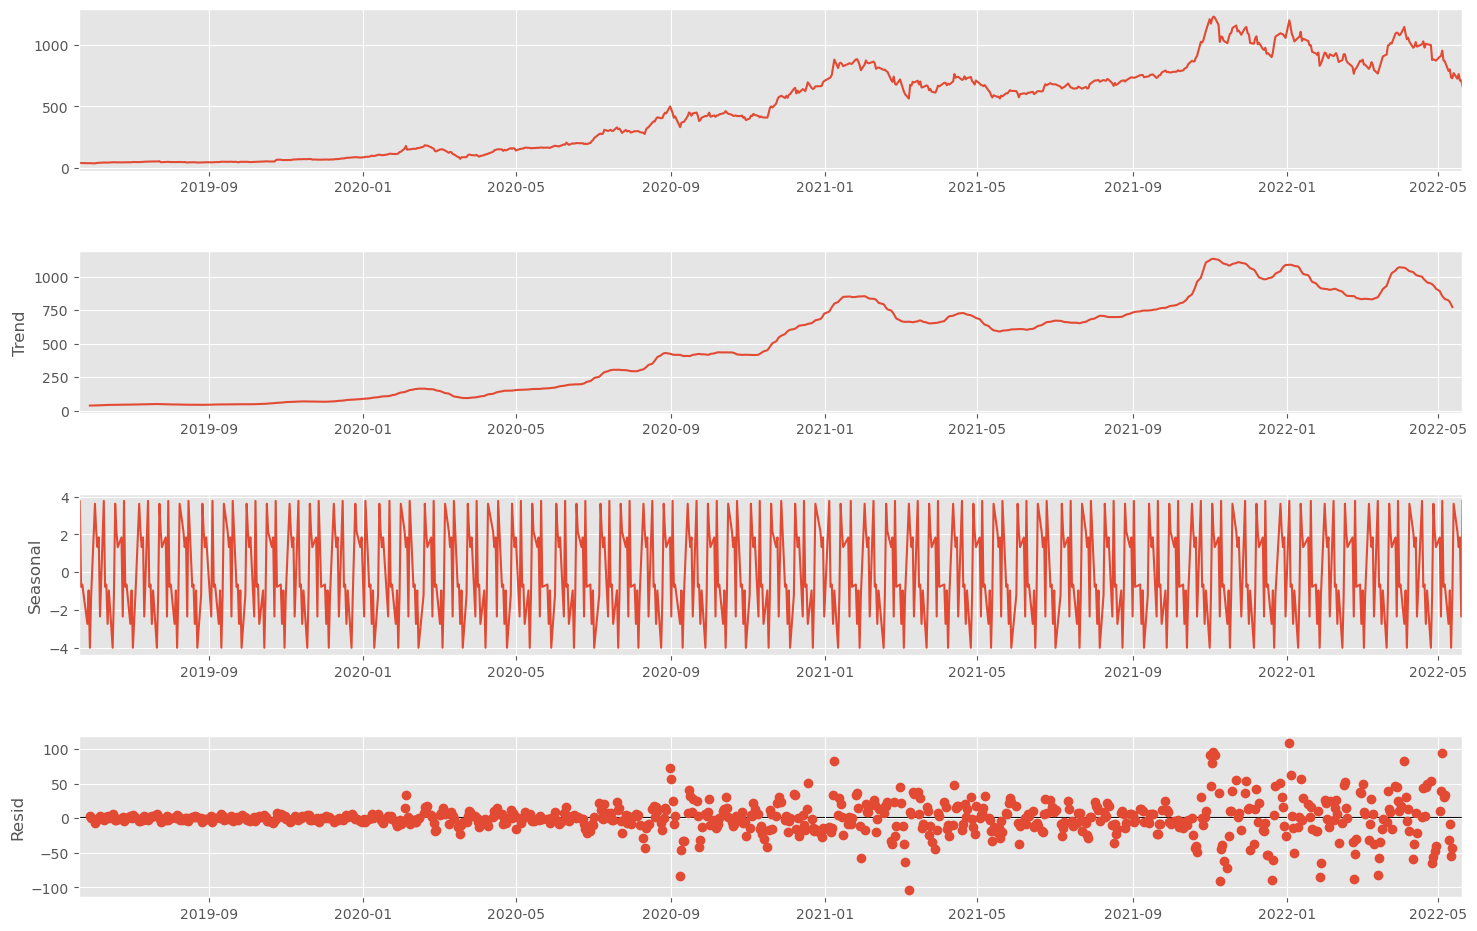

In [49]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
result1=seasonal_decompose(stock_data[["Close"]],period=12,model='multiplicative')

In [51]:
result1.seasonal

Date
2019-05-21    0.998285
2019-05-22    1.007787
2019-05-23    0.997675
2019-05-24    0.992710
2019-05-28    0.988533
                ...   
2022-05-16    1.005393
2022-05-17    1.007126
2022-05-18    1.003538
2022-05-19    0.998285
2022-05-20    1.007787
Name: seasonal, Length: 758, dtype: float64

<AxesSubplot: >

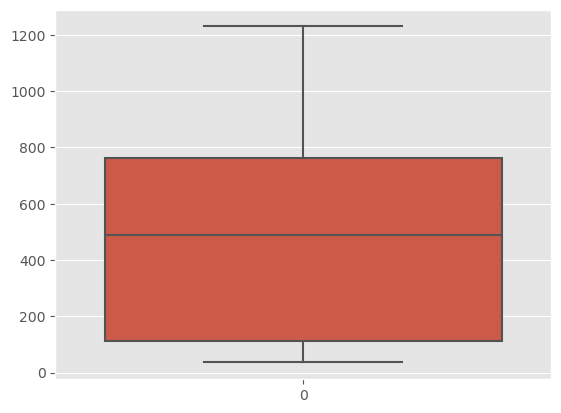

In [53]:
sns.boxplot(stock_data['Close'])

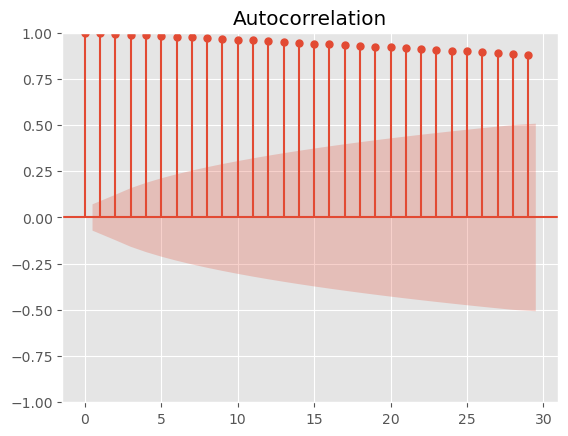

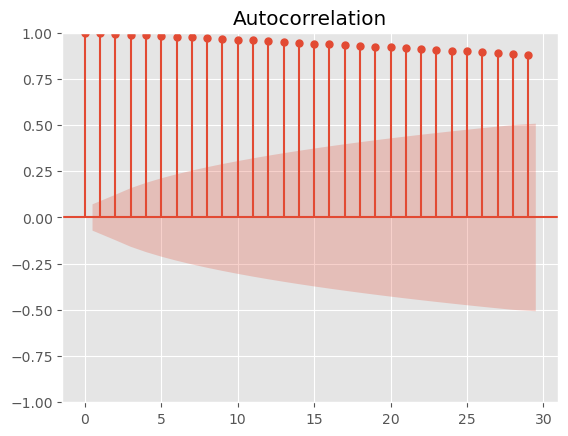

In [55]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock_data['Close'])

/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


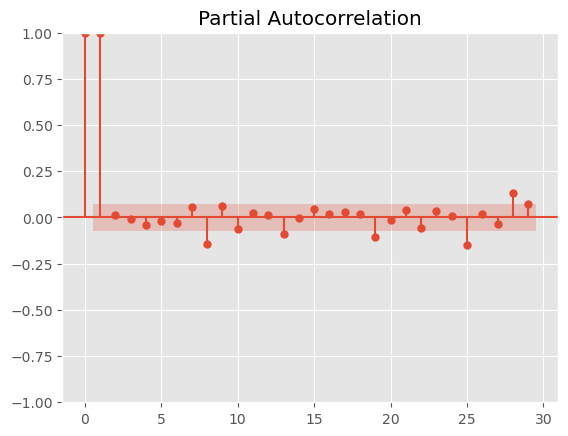

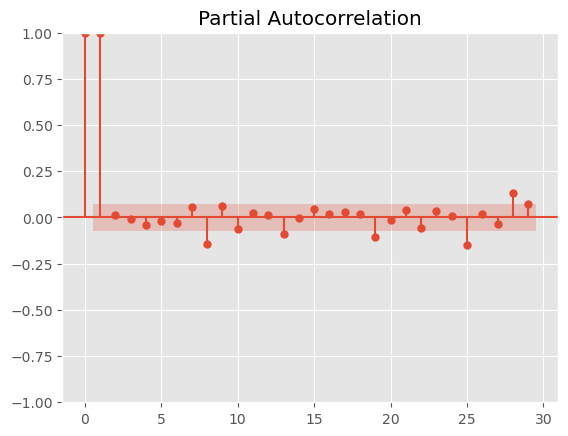

In [56]:
plot_pacf(stock_data['Close'])

In [61]:
df_close11=stock_data['Close']

In [62]:
df_close11.diff()

Date
2019-05-21          NaN
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 758, dtype: float64

In [63]:
df_close1=df_close11.diff()

In [64]:
df_close1.dropna()

Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 757, dtype: float64

In [65]:
df_close=df_close1.dropna()

In [66]:
df_close

Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 757, dtype: float64

In [68]:
# test_stationarity(df_close)
# Now it shows stationary Time-Seies

/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


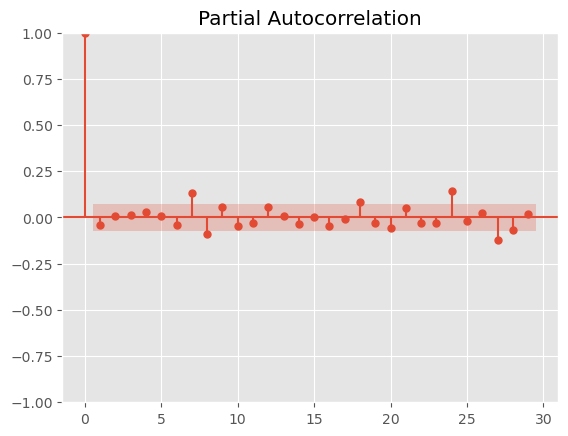

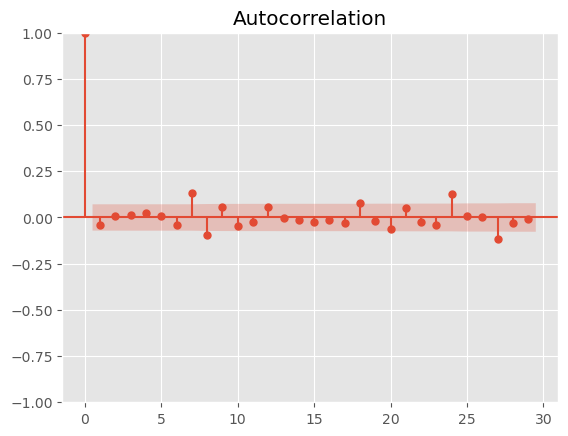

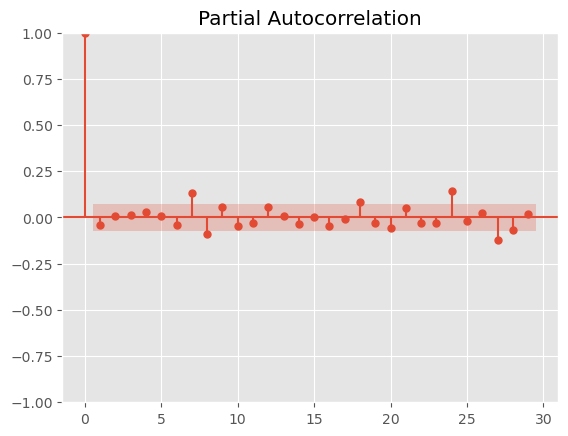

In [69]:
plot_acf(df_close)
plot_pacf(df_close)

In [70]:
train_data=df_close[0:-60]
test_data=df_close[-60:]